Movie Rating Data Analysis by Wendy Molina

Data set obtained from Kaggle website:

https://www.kaggle.com/datasets/anandshaw2001/movie-rating-dataset

This data set captures the popularity of a movie along with its characters, release date, revenue and more.

My objective in this data analysis is to see if there is a significant correlation between movie budget and popularity rating.

In [118]:
#Load the data file using pandas

import pandas as pd
import numpy as np

In [119]:
data = pd.read_csv('tmdb_5000_movies.csv')

In [120]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

We can see that this data has 20 columns, 4804 rows.  The columns have varying data types: float, int and object.

In [122]:
#Checking for null values in the columns:

data.isnull().any()

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title                   False
vote_average            False
vote_count              False
dtype: bool

We can see that there are null values for the following columns:
homepage, overview, release_date, runtime, tagline

In [123]:
#The number of null values for each column:

data.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

As you can see, there are a significant amount of null values for the homepage and tagline.  As this information is not relevant to the data analysis I will be conducting I will drop those two columns.

In [124]:
data = data.drop(['homepage', 'tagline'], axis = 1)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  title                

In [126]:
#Drop the records with nulls in any of the remaining columns:

data = data.dropna()

In [127]:
#Checking  null values:

data.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

The two variables I am interested in are 'vote_average' and 'budget', so I will explore these further.

In [128]:
#What are the unique values of 'vote_average'?

uni_vote = data['vote_average'].unique()
uni_vote.sort()

In [129]:
uni_vote

array([ 0. ,  0.5,  1. ,  1.9,  2. ,  2.2,  2.3,  2.4,  2.6,  2.7,  2.8,
        2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,
        4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,
        5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,
        6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,
        7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,
        8.4,  8.5,  9.3,  9.5, 10. ])

This tells us that the votes are scored with a range of values from 0-10.

In [130]:
#What is the range of budgets for the included movies?

uni_budg = data['budget'].unique()
uni_budg.sort()

In [131]:
uni_budg

array([        0,         1,         3,         4,         7,         8,
              10,        11,        13,        15,        25,        28,
              30,       100,       108,       110,       200,       218,
             250,       500,       650,      7000,      8000,      9000,
           10000,     12000,     15000,     20000,     22000,     27000,
           31192,     46000,     50000,     56000,     60000,     62000,
           65000,     70000,     75000,     85000,    100000,    114000,
          120000,    125000,    130000,    134005,    150000,    160000,
          180000,    200000,    210000,    220000,    225000,    230000,
          245000,    250000,    300000,    312000,    325000,    350000,
          379000,    385907,    400000,    439000,    450000,    500000,
          522360,    550000,    560000,    600000,    609000,    625000,
          650000,    700000,    730000,    750000,    777000,    780000,
          800000,    806948,    850000,    852510, 

In [132]:
#This is useful information, it tells us that budgets vary from $0 to $380,000,000

In [133]:
#For the purpose of this data analysis, I will remove any movies with a budget of less than $1000

In [134]:
data = data.drop(data[data['budget'] < 1000].index)

In [135]:
uni_budg = data['budget'].unique()
uni_budg.sort()
uni_budg

array([     7000,      8000,      9000,     10000,     12000,     15000,
           20000,     22000,     27000,     31192,     46000,     50000,
           56000,     60000,     62000,     65000,     70000,     75000,
           85000,    100000,    114000,    120000,    125000,    130000,
          134005,    150000,    160000,    180000,    200000,    210000,
          220000,    225000,    230000,    245000,    250000,    300000,
          312000,    325000,    350000,    379000,    385907,    400000,
          439000,    450000,    500000,    522360,    550000,    560000,
          600000,    609000,    625000,    650000,    700000,    730000,
          750000,    777000,    780000,    800000,    806948,    850000,
          852510,    858000,    860000,    878000,    900000,    910000,
          930000,    950000,    967686,   1000000,   1100000,   1200000,
         1250000,   1288000,   1300000,   1344000,   1350000,   1377800,
         1400000,   1455000,   1488423,   1493619, 

In [136]:
#Movies with less than $1000 budget were successfully removed

In [137]:
#To simplify the data, I changed the budget column to 'millions'


data['budget'] = data['budget'].div(1000000)
data = data.rename(columns={'budget': 'budget_millions'})


In [138]:
data['budget_millions']

0       237.000
1       300.000
2       245.000
3       250.000
4       260.000
         ...   
4788      0.012
4792      0.020
4796      0.007
4798      0.220
4799      0.009
Name: budget_millions, Length: 3732, dtype: float64

In [139]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Movie Ratings')

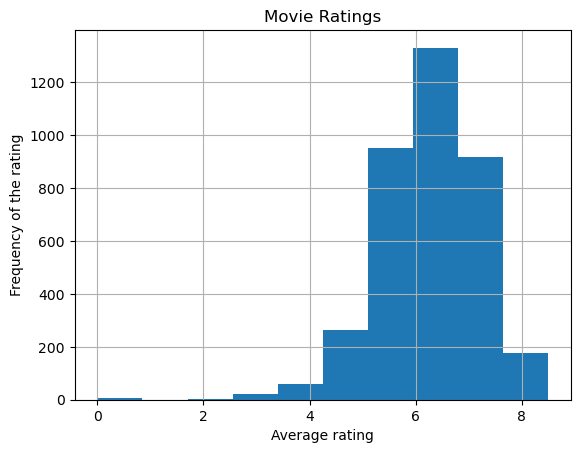

In [140]:
#Histogram for ratings

data.hist(column='vote_average');
plt.ylabel('Frequency of the rating');
plt.xlabel('Average rating');
plt.title('Movie Ratings')

In [141]:
#This histogram shows that majority of the average ratings are between 5 - 7

Text(0.5, 1.0, 'Budget')

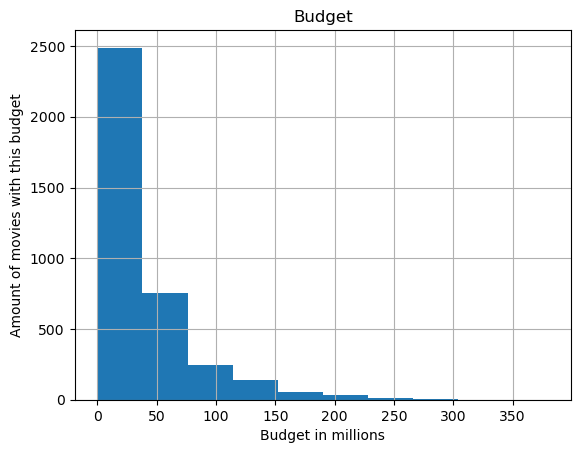

In [142]:
#Histogram for budget

data.hist(column='budget_millions');
plt.ylabel('Amount of movies with this budget');
plt.xlabel('Budget in millions');
plt.title('Budget')

In [144]:
#This histogram demonstrates that the majority of films had a budget up to 7 million dollars

In [145]:
data['budget_millions'].describe()

count    3732.000000
mean       37.376048
std        42.695890
min         0.007000
25%         8.650000
50%        23.800000
75%        50.000000
max       380.000000
Name: budget_millions, dtype: float64

In [146]:
#The average budget is around 37 million dollars

In [147]:
data['budget_millions'].mode()

0    20.0
Name: budget_millions, dtype: float64

In [148]:
#The mode of budgets is 20 million
#This indicates that there are outliers that are skewing the data
#I will use the Interquartile Rule to find outliers

In [149]:
#Interquartile range:

#50-8.65 = 41.35

#Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).

#41.35*1.5 = 62.025

#Add this to the third quartlie, any number greater than this is a suspected outlier.

#50 + 62.025 = 112.025

#Any budget higher than around 112 million is a suspected outlier



In [151]:
data.shape

(3732, 18)

In [152]:
#Delete rows with outliers:

drop_budg_outliers = (data['budget_millions'] > 112)
data = data[~drop_budg_outliers]

In [153]:
data.shape

(3486, 18)

In [154]:
#The amount of outliers dropped were 246

Text(0.5, 1.0, 'Budget')

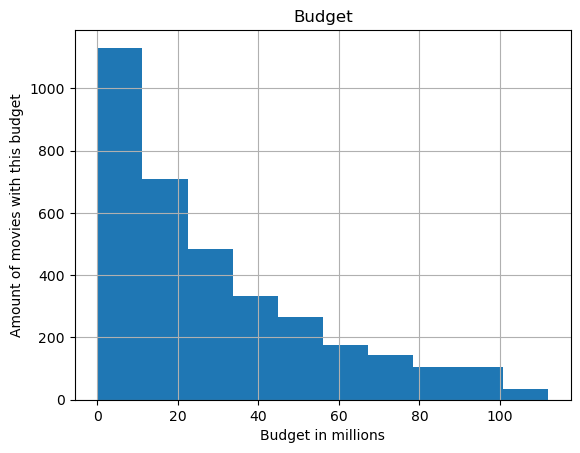

In [155]:
#Lets look at the Histogram for budget again now that the outliers are removed

data.hist(column='budget_millions');
plt.ylabel('Amount of movies with this budget');
plt.xlabel('Budget in millions');
plt.title('Budget')

In [156]:
#This shows a distribution with a right skew, which reflects the mode of 20 million more accurately

<Axes: xlabel='vote_average', ylabel='budget_millions'>

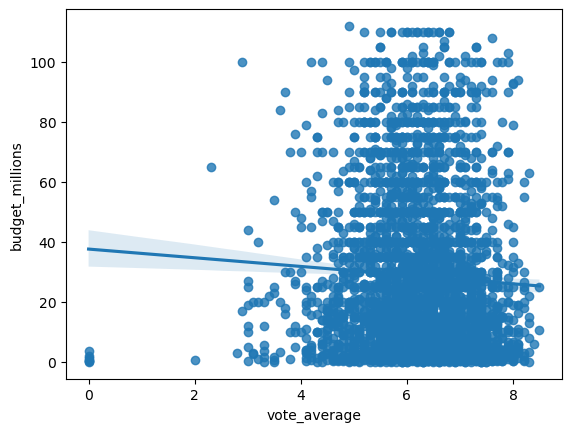

In [159]:
#Now let's look at the correlation between average votes and budget to answer the question 'does the budget of a flim have an effect on its popularity?'

import seaborn as sns

sns.regplot(data=data, x='vote_average',y='budget_millions')

In [160]:
data[['vote_average', 'budget_millions']].corr()

,vote_average,budget_millions
vote_average,1.000000,-0.052864
budget_millions,-0.052864,1.000000


In [162]:
#From the graph and the correlation value of -0.052 we can see:  
#there is not significant linear relationship (correlation) between budget and average votes (popularity)